# Homework 3 notes

For Homework 3, Problem 2 was randomly selected for instructor grading. 
This notebook contains my notes from general trends in the class's code and interesting questions raised in your reflections.

The topics covered in the notes include:

* User prompts
* Testing your code
* Alternative approach: recursion

## User prompts
A lot of solutions to Problem 2 (and others) involved prompting users for an input value.
That might look something like this:

```python
a = input("Enter a positive number: ")
sqrt_approx(a, tol=1e-6)
```

While there's nothing wrong with this approach in terms of solving the stated problem, it does create a serious limitation on the usability of your code.
The main advantage of using computers is that they can perform calculations millions of times faster than humans.
When we put hard stops in our code that have to wait for a human user to type something in, we're doing two things: (1) allowing user control over what's being calculated and (2) bringing the calculations to a screeching halt.
In general, allowing user control is good and pausing the computer's work is not so good.

Of course, you're unlikely to need to re-use your square root approximation since that particular calculation can be done without writing your own function for it.
But I encourage everyone to adopt the practice of thinking about re-usability (that's why it's built in to so many of the reflection prompts).
However, I don't want anyone to get carried away with the idea of *maximizing* re-usability.
For now, getting the core functionality of our work into... well, functions... is a great place to focus.

## Testing your code

A few solutions explicitly included tests that checked whether the code produced the expected output for several input values.
This is a great practice and will help make your code more robust by showing you mistakes when you're looking for them (rather than when you're trying to use your code to accomplish something else).
I'm sure several students tested their code manually and confirmed that it was working as intended.
Manual checking is also a good practice and it's perfectly fine for your homework assignments.
Formal software testing is out of scope for this class, but it's still a good idea to run your functions through a few loops of parameters to confirm it's working how you think it's working.
Plotting the results is a great way to review your code's behavior. 
For example, if given input values ($x$) ranging from -10 to 10, I would expect a plot of the square root approximation results ($y$) from Problem 2 (without any modifications or improvements) to look like a straight line, $y=0$, up to a $x$ value of zero and to have a concave downward curve with a very steep slope near $x=0$ and a shallow slope for large values of $x$. And I'd look for a few points where I knew what the square root should be.
The code below plots the results of a modified version of a solution I saw while grading Homework 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

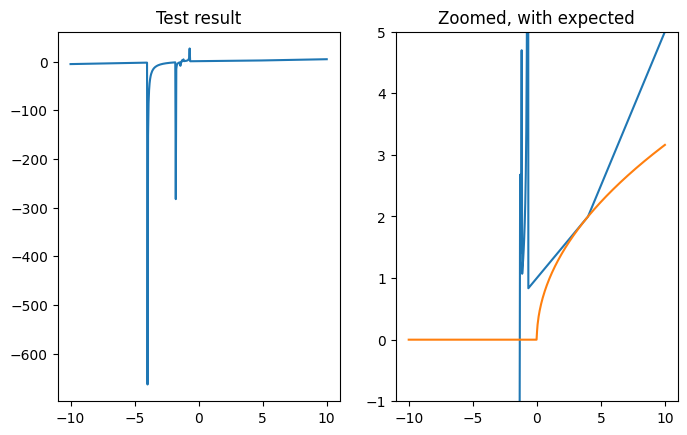

In [2]:
def sqrt_approx(a, tol=1e-6):
    guess = a / 2
    while True:
        new_guess = (guess + a / guess) / 2
        e_a = (new_guess - guess) / new_guess
        if e_a < tol:
            break
        guess = new_guess
    return guess

x = np.linspace(-10,10,500)
y = np.zeros(len(x))
for i, x_val in enumerate(x):
    y[i] = sqrt_approx(x_val)

fig, axs = plt.subplots(1,2)
fig.set_figwidth(8)
axs[0].plot(x,y)
axs[1].plot(x,y)
axs[1].plot(x,np.concatenate((np.zeros(len(x[x<0])),np.sqrt(x[x>=0]))))
axs[1].set_ylim(-1,5)

axs[0].set_title("Test result")
axs[1].set_title("Zoomed, with expected")
plt.show()

The plot on the left shows the full result of the algorithm tested over 500 values for $x$ between -10 and 10.
The plot on the right is zoomed in and also shows the expected output from the algorithm.

Clearly, there is something wrong with the implementation of the square root approximation. 
But it's also clear that there are some places where doing a spot check would return an answer very close to the expected value.
This is a case where spot checking two or three values (between $x=2$ and $x=4$) would give a false sense of confidence in the code.

## Alternative approach: recursion

A few students asked about alternative methods to solving the square root approximation problem from Homework 3.
The flowchart that presented the algorithm seemed to use something like a `while True:` style loop that needed to be broken with an internal `if <condition>:` statement with a `break` statement inside it.
Several students combined these approaches to use a `while <condition>:` statement (where the "condition" being checked would be opposite of the one from the flowchart).
Both of these work, and the second is probably easier to read.

Another option for this kind of problem is to use a *recursive* function.
A function is recursive if it *calls itself* at some point during its execution with the right input parameters.
For a function seeking an approximation within a set tolerance, a recursive solution would involve making one approximation, checking the tolerance and returning the solution if the tolerance is met and calling itself if the tolerance is not met. 
These recursive calls will continue until the tolerance is met, at which point, the solution is returned (through a chain of repeated calls to the function). 

The recursive version of the problem is implemented twice below.
The first version is just the plain code needed to implement the algorithm.
The second version is verbose (i.e., it spits out text describing what it's doing).
It includes print statements describing what's being done at each recursion level.

### Plain code version

In [3]:
def step_approximation(a, x, tol, error=1):
    y = (x + a / x) / 2
    error = abs((y - x) / y)
    if error < tol:
        return y
    else:
        return step_approximation(a, y, tol, error)


def sqrt_approx(a, tol=1e-5):
    if a > 0:
        return step_approximation(a, a / 2, tol)
    else:
        return 0

sqrt_approx(100, tol=1e-6)

10.0

### Verbose version
In this version, print statements have been added that keep track of the **recursion depth**. 
A depth of `0` means it's the first call to the function (from within `sqrt_approx()`).
Depths of `1` and greater are recursive calls from within `step_approximation()`.

As you can see from the output, when finding the square root of 100 to a tolerance of `1e-6`, there is one original call, followed by six recursive calls to `step_approximation()`.
On the sixth recursive call, the error is within the specified tolerance, so a result is returned instead of making another recursive call.
Since all the calls to `step_approximation()` are expecting a result, **all** of the recursive calls are waiting for something to get returned. 
When this eventually happens, the result gets passed back "up" the recursive chain and back out to `sqrt_approx()`, which accepts it without knowing or caring how it was calculated.


In [4]:
def step_approximation(a, x, tol, error=1, depth=0):
    y = (x + a / x) / 2
    error = abs((y - x) / y)
    print(
        f"{'  '*depth}{depth}: Between approximations for sqrt({a}) of {x:.9f} and {y:.9f}, the error is {error:.11f}."
    )
    if error < tol:
        print(f"{'  ' * depth}{depth}: That's close enough! The 'answer' is {y:.9f}. Passing this result along...")
        return y
    else:
        print(
            f"{'  ' * depth}{depth}: That's not close enough... call step_approximation({a}, {y:.9f}, {tol}, {error:.11f})."
        )
        result = step_approximation(a, y, tol, error, depth=depth+1)
        print(
            f"{'  ' * depth}{depth}: Result of {result:.9f} received... passing it along."
        )
        return result


def sqrt_approx(a, tol=1e-5):
    if a > 0:
        return step_approximation(a, a/2, tol)
    else:
        return 0

sqrt_approx(100, tol=1e-6)

0: Between approximations for sqrt(100) of 50.000000000 and 26.000000000, the error is 0.92307692308.
0: That's not close enough... call step_approximation(100, 26.000000000, 1e-06, 0.92307692308).
  1: Between approximations for sqrt(100) of 26.000000000 and 14.923076923, the error is 0.74226804124.
  1: That's not close enough... call step_approximation(100, 14.923076923, 1e-06, 0.74226804124).
    2: Between approximations for sqrt(100) of 14.923076923 and 10.812053925, the error is 0.38022590582.
    2: That's not close enough... call step_approximation(100, 10.812053925, 1e-06, 0.38022590582).
      3: Between approximations for sqrt(100) of 10.812053925 and 10.030495204, the error is 0.07791825884.
      3: That's not close enough... call step_approximation(100, 10.030495204, 1e-06, 0.07791825884).
        4: Between approximations for sqrt(100) of 10.030495204 and 10.000046357, the error is 0.00304487062.
        4: That's not close enough... call step_approximation(100, 10.0000

10.0